In [33]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [28]:
import calibrate_stereo

In [29]:
lr = calibrate_stereo.calibrate_both()

@@@@  LEFT @@@@
processing ./data/left01.jpg... 
           ./data/left01.jpg... OK
processing ./data/left02.jpg... 
           ./data/left02.jpg... OK
processing ./data/left03.jpg... 
           ./data/left03.jpg... OK
processing ./data/left04.jpg... 
           ./data/left04.jpg... OK
processing ./data/left05.jpg... 
           ./data/left05.jpg... OK
processing ./data/left06.jpg... 
           ./data/left06.jpg... OK
processing ./data/left07.jpg... 
           ./data/left07.jpg... OK
processing ./data/left08.jpg... 
           ./data/left08.jpg... OK
processing ./data/left09.jpg... 
           ./data/left09.jpg... OK
processing ./data/left11.jpg... 
           ./data/left11.jpg... OK
processing ./data/left12.jpg... 
           ./data/left12.jpg... OK
processing ./data/left13.jpg... 
           ./data/left13.jpg... OK
processing ./data/left14.jpg... 
           ./data/left14.jpg... OK

RMS: 0.19643790890334012
camera matrix:
 [[532.79536562   0.         342.45825163]
 [  0.         5

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2 

In [31]:
def sshow(n=0):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow (lr['l']['uimgs'][n]);axes[0].set(title=f'left {n}');
    axes[1].imshow (lr['r']['uimgs'][n]);axes[1].set(title=f'right {n}');

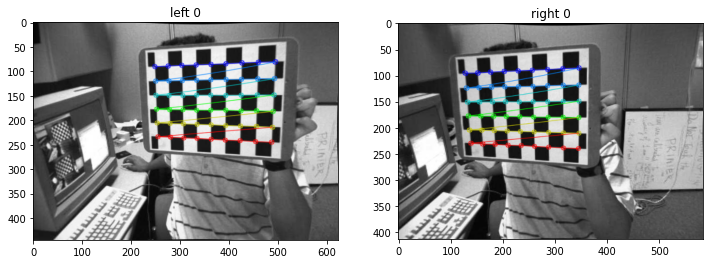

In [32]:
sshow()

In [137]:
def proj(P, X):
    p = P @ X 
    return p / p[-1]

In [127]:
tvec = np.array([10, 0, 1])
tvec = np.array([4, 0, 3])
rad = -np.pi / 10 
rvec = np.array([0, rad, 0])
R, _ = cv2.Rodrigues(rvec)

In [128]:
R

array([[ 0.95105652,  0.        , -0.30901699],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.30901699,  0.        ,  0.95105652]])

In [129]:
tvec

array([4, 0, 3])

In [130]:
P1 = np.vstack((np.eye(3), np.array([0,0,0]))).T
P1

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [131]:
P2 = np.vstack((R.T, tvec)).T 
P2 

array([[ 0.95105652,  0.        , -0.30901699,  4.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.30901699,  0.        ,  0.95105652,  3.        ]])

In [138]:
# Rectification matrix
A = np.zeros((3,3))
that = tvec / np.linalg.norm(tvec)
A[:,0] = that 
yhat = np.array([-that[1], that[0], 0])
A[:,1] = yhat / np.linalg.norm(yhat)
A[:,2] = np.cross(A[:,0], A[:,1])

A

array([[ 0.8, -0. , -0.6],
       [ 0. ,  1. , -0. ],
       [ 0.6,  0. ,  0.8]])

In [144]:
X = np.array([[1, 0, 10, 1], [0, 1, 10, 1], [1, 2, 20, 1], [0, 0, 10, 1]]).T 
X.shape , X 

((4, 4),
 array([[ 1,  0,  1,  0],
        [ 0,  1,  2,  0],
        [10, 10, 20, 10],
        [ 1,  1,  1,  1]]))

In [145]:
x1 = proj(P1, X)
x2 = proj(P2, X)
x1, x2 

(array([[0.1 , 0.  , 0.05, 0.  ],
        [0.  , 0.1 , 0.1 , 0.  ],
        [1.  , 1.  , 1.  , 1.  ]]),
 array([[ 0.14515969,  0.07272494, -0.05505039,  0.07272494],
        [ 0.        ,  0.07993244,  0.08956502,  0.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ]]))

---

Rectification

In [146]:
H2 = A.T 
H1 = H2 @ R 

In [147]:
rx1 = proj(H1, x1)
rx2 = proj(H2, x2)
rx1, rx2 

(array([[0.45742394, 0.34178966, 0.39860155, 0.34178966],
        [0.        , 0.10567971, 0.10751712, 0.        ],
        [1.        , 1.        , 1.        , 1.        ]]),
 array([[1.00452174, 0.87018822, 0.66739437, 0.87018822],
        [0.        , 0.10567971, 0.10751712, 0.        ],
        [1.        , 1.        , 1.        , 1.        ]]))

In [148]:
rx2 - rx1 

array([[0.5470978 , 0.52839856, 0.26879281, 0.52839856],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [154]:
Q1 = P1
Q2R = H2 @ R @ H1.T 
Q2t = H2 @ tvec
Q2 = np.vstack( (Q2R.T, Q2t.T)).T
Q1, Q2 

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]),
 array([[1.00000000e+00, 0.00000000e+00, 1.09176111e-16, 5.00000000e+00],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.09176111e-16, 0.00000000e+00, 1.00000000e+00, 4.44089210e-16]]))